25.04.19

# Using NumPy, matplotlib and SciPy
## Tutorial 1, Exercise 2: Histograms, noise and filtering
The goal of this exercise is for you to **become familiar with the important packages NumPy, matplotlib and SciPy**.
Here you will load an image, add noise and look at the histograms of the different color channels.
You need to replace the `???` in the code with the required commands.

Your task is to calculate histograms of an image, add noise to it,
and apply a low-pass filter.

## Part 1: Loading the image and analyzing the color channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

Use ``plt.imread`` to read in ``'bears.jpg'`` and save the color channels into separate NumPy arrays. Check the image dimensions before and after splitting the colors with with the ``shape`` attribute of ``img``, red, green, and blue.
``img`` should be a 3D array and the colors a 2D array, respectively.

In [2]:
img = plt.imread(r"bears.jpg") / 255.  # Division to norm to an interval [0, 1]
sh = img.shape
sh

(350, 350, 3)

Select red, green, and blue channels:

In [3]:
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

In [4]:
print(sh, red_channel.shape, green_channel.shape, blue_channel.shape)

(350, 350, 3) (350, 350) (350, 350) (350, 350)


Display the original and the three color channels in an array of subplots.
Therefore, open a figure with ``plt.figure()`` and use ``plt.subplot(...)`` to plot
them in a $2 \times 2$ array. To use the function correctly, look up the help by
typing ``plt.subplot?`` in the ipython console or ``help(plt.subplot)`` in Python.

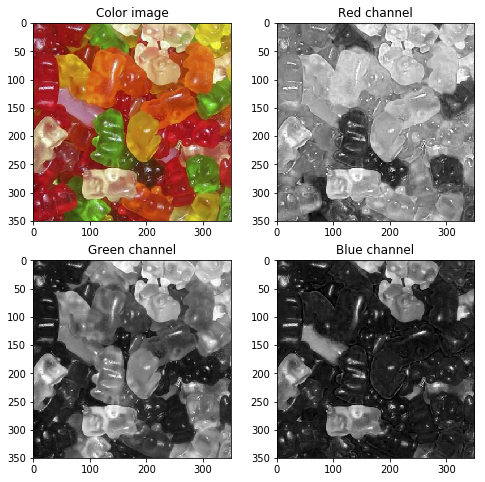

In [5]:
plt.figure(1, figsize=(8,8))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Color image')
plt.subplot(2, 2, 2)
plt.imshow(red_channel,cmap='gray')
plt.title('Red channel')
plt.subplot(2, 2, 3)
plt.imshow(green_channel,cmap='gray')
plt.title('Green channel')
plt.subplot(2, 2, 4)
plt.imshow(blue_channel,cmap='gray')
plt.title('Blue channel');

Create the histograms of the three color channels separately
using the ``np.histogram`` function. Use 50 bins and a range of ``(0, 1)``.
Afterwards, plot them into one histogram line plot. Keep in mind that
``np.histograms`` returns left and right bin margins. Therefore, you will need
to create the central bin positions by yourself!

In [6]:
red_hist = np.histogram(red_channel,bins=50,range=(0,1))
green_hist = np.histogram(green_channel,bins=50,range=(0,1))
blue_hist = np.histogram(blue_channel,bins=50,range=(0,1))

In case you do not know how to do the last part look at the lower parts of
the script. The lines before will appear again in a similar fashion.


In [7]:
red_bins = red_hist[1]
central_bins = (red_bins[1:] + red_bins[:-1]) / 2.

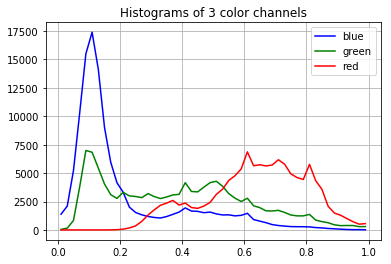

In [8]:
plt.figure(2)
plt.title('Histograms of 3 color channels')
plt.plot(central_bins, blue_hist[0], 'b', label='blue')
plt.plot(central_bins, green_hist[0], 'g', label='green')
plt.plot(central_bins, red_hist[0], 'r', label='red')
plt.grid()
plt.legend()
plt.show()

It is more appropriate to use a bar graph instead of a normal plot for histograms. The ``plt.bar`` function takes the width of each bar as a third parameter:

In [9]:
bin_width = red_bins[1] - red_bins[0]

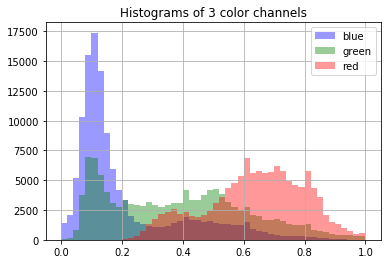

In [10]:
plt.figure(2)
plt.title('Histograms of 3 color channels')
plt.bar(central_bins, blue_hist[0], bin_width, color='b', label='blue', alpha=.4)
plt.bar(central_bins, green_hist[0], bin_width, color='g', label='green', alpha=.4)
plt.bar(central_bins, red_hist[0], bin_width, color='r', label='red', alpha=.4)
plt.grid()
plt.legend()


## Part 2: Adding noise to the image

Now, let's add some **Gaussian noise** with a standard deviation of 0.1 and a mean of zero to the image with the function
``np.random.normal``:

In [11]:
img_noisy = img + np.random.normal(0,0.1,img.shape)

Note, that values below 0. and above 1. wrap around on the color scale
Therefore, they have to be set back to 0. or 1. respectively
Hint: The coordinates to index the array can also be a boolean array of the
same shape. So, if you want to select all pixels with a value smaller
than 0, you can use ``img_noisy < 0``.

In [12]:
img_noisy[img_noisy<0.] = 0.
img_noisy[img_noisy>1.] = 1.

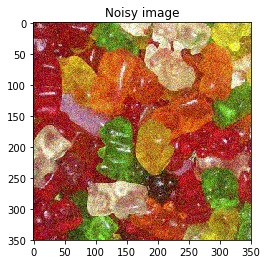

In [13]:
plt.figure(3)
plt.title('Noisy image')
plt.imshow(img_noisy, cmap='gray', vmin=0, vmax=1.)

In [14]:
red_hist_noisy = np.histogram(img_noisy[..., 0], bins=50, range=(0, 1))
green_hist_noisy = np.histogram(img_noisy[..., 1], bins=50, range=(0, 1))
blue_hist_noisy = np.histogram(img_noisy[..., 2], bins=50, range=(0, 1))

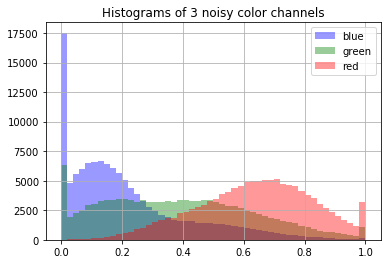

In [15]:
plt.figure(4)
plt.title('Histograms of 3 noisy color channels')
plt.bar(central_bins, blue_hist_noisy[0], bin_width, color='b', alpha=.4, label='blue')
plt.bar(central_bins, green_hist_noisy[0], bin_width, color='g', alpha=.4, label='green')
plt.bar(central_bins, red_hist_noisy[0], bin_width, color='r', alpha=.4, label='red')
plt.grid()
plt.legend()

## Part 3: Applying a Gaussian low-pass filter

After adding noise, we want to (partially) remove it again by **Gaussian filtering**.
Therefore, the function ``gaussian_filter`` of the ``nd.filter`` module can be used.
Apply the filter with a filter kernel size of ``sigma=1``.
You can either filter each image band separately or give a list of sigmas
(one for each dimension) and make sure that you do not filter across color
channels with a zero at the right place.

The ``0`` in the last axis means that we do not mix different color channels of the image.

In [16]:
nd.filters.gaussian_filter?

In [17]:
sigma = (1, 1, 0)
img_filtered = nd.filters.gaussian_filter(img_noisy,sigma=sigma)

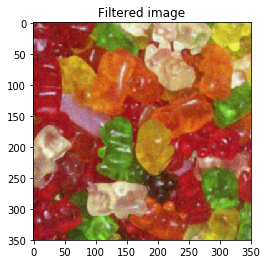

In [18]:
plt.figure(5)
plt.title('Filtered image')
plt.imshow(img_filtered, cmap='gray', vmin=0, vmax=1.)

Finally, let's look at the histograms again:

In [19]:
red_hist_filtered = np.histogram(img_filtered[..., 0], bins=50, range=(0, 1))
green_hist_filtered = np.histogram(img_filtered[..., 1], bins=50, range=(0, 1))
blue_hist_filtered = np.histogram(img_filtered[..., 2], bins=50, range=(0, 1))

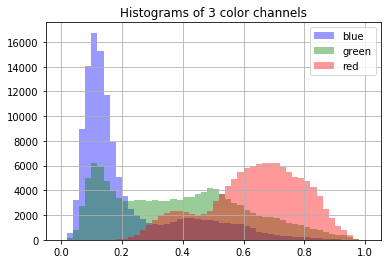

In [20]:
plt.figure(5)
plt.title('Histograms of 3 color channels')
plt.bar(central_bins, blue_hist_filtered[0], bin_width, color='b', label='blue', alpha=.4)
plt.bar(central_bins, green_hist_filtered[0], bin_width, color='g', label='green', alpha=.4)
plt.bar(central_bins, red_hist_filtered[0], bin_width, color='r', label='red', alpha=.4)
plt.grid()
plt.legend()